In [1]:
from IPython.display import clear_output
from ipywidgets import Output
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import chess
import chess.pgn
import time
import io

# Magyar megnyitás
Világos g3-al nyit.  
Benkő Pál magyar nagymesterről kapta a nevét, aki ezzel a megnyitással győzte le az 1962-es világbajnokjelöltek versenye első, illetve harmadik fordulójában Curaçao-ban Bobby Fischert és Mihail Talt.

Move.from_uci('g2g3')

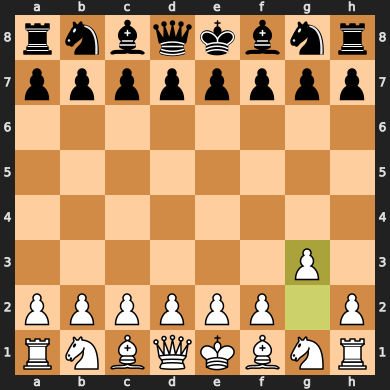

In [3]:
board = chess.Board()
board.push_san("g3")
display(board)

### Világos 3 lépésben sáncol

Move.from_uci('e1g1')

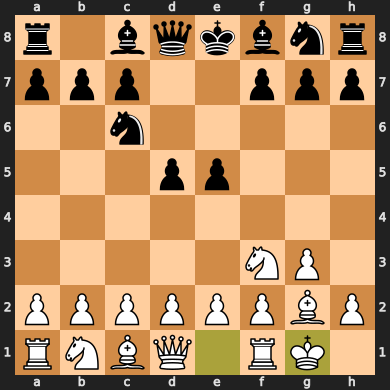

In [4]:
gyors_sancolas = ["g3", "e5", "Bg2", "Nc6", "Nf3", "d5", "O-O"]
board = chess.Board()
for move in gyors_sancolas:
    clear_output(wait=True)
    board.push_san(move)
    display(board)
    # time.sleep(1)

### "névadó" játék megnyitása, 1962

Move.from_uci('e1g1')

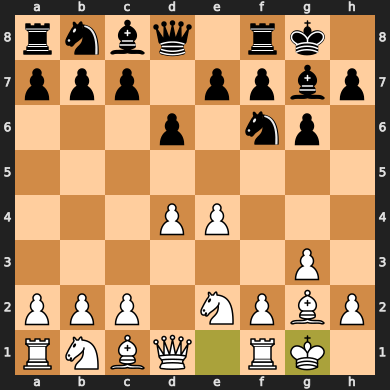

In [5]:
benko_vs_fischer = ["g3", "Nf6", "Bg2", "g6", "e4", "d6", "d4", "Bg7", "Ne2", "O-O", "O-O"]
board = chess.Board()
for move in benko_vs_fischer:
    clear_output(wait=True)
    board.push_san(move)
    display(board)
    # time.sleep(1)

# Heatmap
Melyik mezőt hány báb támadja? (világos)

In [6]:
import matplotlib
matplotlib.rcParams['backend'] = "template"
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [7]:
matrix = [[0 for x in range(8)] for y in range(8)]; matrix

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0]]

In [8]:
a4 = chess.A4.real;
rank = 7 - (a4 >> 3); # div 8
file = a4  & 7; # modulo 8
matrix[rank][file]=1; matrix

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0]]

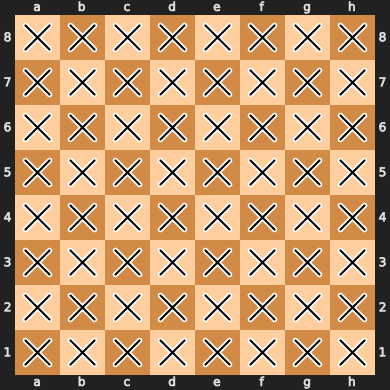

In [9]:
all_squares = chess.SquareSet(chess.BB_ALL);all_squares

### összes mező világos-támadásai mátrixban

In [10]:
for square in all_squares:
    rank = 7 - (square >> 3); # div 8
    file = square  & 7; # modulo 8
    attackers = len(board.attackers(chess.WHITE, square))
    matrix[rank][file] = attackers
matrix

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 1, 1, 1, 1, 1, 0],
 [0, 0, 0, 2, 1, 3, 0, 1],
 [2, 2, 3, 2, 2, 1, 3, 1],
 [1, 1, 1, 3, 1, 2, 1, 1],
 [0, 1, 2, 1, 2, 3, 2, 2]]

### heatmap

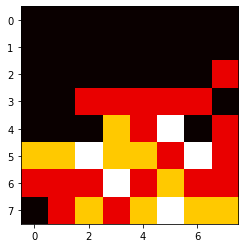

In [14]:
plt.imshow(matrix, cmap="hot", interpolation="nearest")